In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import wimprates
import numericalunits as nu

/opt/anaconda3/lib/python3.13/site-packages/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


/opt/anaconda3/lib/python3.13/site-packages/wimprates/elastic_nr.py:193: RuntimeWarning: invalid value encountered in scalar divide
  return ((mn(material) * erec)/mu_nucleus(mw, material) + delta)/(np.sqrt(2 * mn(material) * erec))
/opt/anaconda3/lib/python3.13/site-packages/wimprates/elastic_nr.py:73: RuntimeWarning: invalid value encountered in scalar divide
  return np.sin(x) / x**2 - np.cos(x) / x
/opt/anaconda3/lib/python3.13/site-packages/wimprates/elastic_nr.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sin(x) / x**2 - np.cos(x) / x
/opt/anaconda3/lib/python3.13/site-packages/wimprates/elastic_nr.py:279: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return halo_model.rho_dm / mw * (1 / mn(material)) * quad(
/opt/anaconda3/lib/python3.13/site-packages/wimprates/elastic_nr.py:235: IntegrationWarning: The occurrence of roundoff 

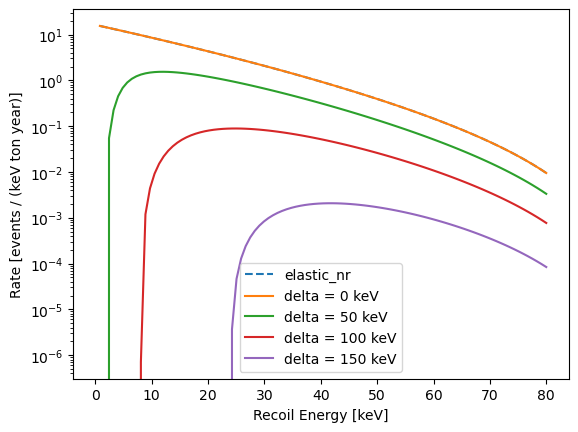

In [2]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(0, 80, 100) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
)

dr_de_50 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=50  # 能级差 (keV)
)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
)

dr_de_150 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=150  # 能级差 (keV)
)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_50, label='delta = 50 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_150, label='delta = 150 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV ton year)]')
plt.legend()
plt.show()

In [3]:
wimprates.rate_wimp_std(1, mw=50, sigma_nucleon=1e-45)

33.19098343826968

In [6]:
energies = np.linspace(0.01, 40, 100)
dr = wimprates.rate_wimp_std(energies, mw=50, sigma_nucleon=1e-45)

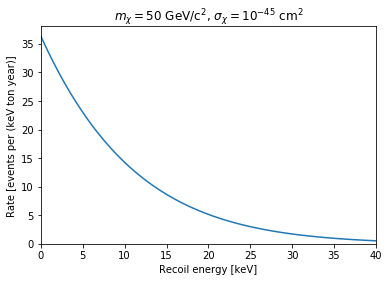

In [7]:
plt.plot(energies, dr)

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.title("$m_\chi = 50$ GeV/c${}^2$, $\sigma_\chi = 10^{-45}$ cm${}^2$")
plt.xlim(0, energies.max())
plt.ylim(0, None);

In [4]:
help(wimprates.rate_wimp_std)

Help on function rate_wimp_std in module wimprates.summary:

rate_wimp_std(es, mw, sigma_nucleon, m_med=inf, t=None, **kwargs)
    Differential rate per (ton year keV) of WIMP-nucleus scattering.
    :param es: Recoil energies in keV
    :param mw: WIMP mass in GeV/c^2
    :param sigma_nucleon: WIMP-nucleon cross-section in cm^2
    :param m_med: Medator mass in GeV/c^2. If not given, assumed very heavy.
    :param t: A J2000.0 timestamp. If not given,
    conservative velocity distribution is used.
    :returns: numpy array of same length as es
    
    Further arguments are as for rate_wimp; see docstring of rate_wimp.



In [5]:
help(wimprates.rate_wimp)

Help on function rate_wimp in module wimprates.summary:

rate_wimp(es, mw, sigma_nucleon, interaction='SI', detection_mechanism='elastic_nr', m_med=inf, t=None, progress_bar=False, **kwargs)
    Differential rate per unit time, unit detector mass
    and unit recoil energy of WIMP-nucleus scattering.
    Use numericalunits to get variables in/out in the right units.
    
    :param es: Energy of recoil (for elastic_nr)
    or emitted photon(for bremsstrahlung and Migdal)
    :param mw: Mass of WIMP
    :param sigma_nucleon: WIMP-nucleon cross-section
    :param interaction: string describing DM-nucleus interaction. Options:
        'SI' for spin-independent scattering;
            equal coupling to protons and neutrons.
        'SD_n_xxx' for spin-dependent scattering
            n can be 'n' or 'p' for neutron or proton coupling (at first order)
            x can be 'central', 'up' or 'down' for
                theoretical uncertainty on structure function.
    :param detection_mechan